In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import CommentPull.CommentPuller
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

In [2]:
#Make graphs pretty and bigger
plt.rcParams['figure.figsize'] = (10, 10)
sns.set()

In [3]:
#Load data using custom class
comment_puller = CommentPull.CommentPuller.CommentPuller(load=True)

In [4]:
#Split title data
X_title = comment_puller.title_df.drop(['label_id', 'post_id'], axis=1)
y_title = comment_puller.title_df['label_id']
X_title_train, X_title_test, y_title_train, y_title_test = train_test_split(X_title, y_title,
                                                                           test_size=0.15, random_state=10)
#Scale training data
title_scaler = RobustScaler()
X_title_train = title_scaler.fit_transform(X_title_train)

#Scale test data in same manner
X_title_test = title_scaler.transform(X_title_test)

In [5]:
#Split text data 
X_text = comment_puller.text_df.drop(['label_id', 'post_id'], axis=1)
y_text = comment_puller.text_df['label_id']
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text,
                                                                           test_size=0.15, random_state=10)
#Scale training data
text_scaler = RobustScaler()
X_text_train = text_scaler.fit_transform(X_text_train)
#Scale test data in same manner as training
X_text_test = text_scaler.transform(X_text_test)

In [19]:
#Let's begin with a Logisitic Regression Model
#Intialize model
log_title = LogisticRegression(solver='newton-cg')
#Create a parameter grid over which we can gridsearch
param_grid ={'C':np.logspace(-4, 4, 10) , 'penalty':['l1', 'l2']}
#Intialize a gridsearch object
log_title_gs = GridSearchCV(log_title, param_grid, cv=5, scoring='roc_auc')
#Fit the gridsearch object
log_title_gs.fit(X_title_train, y_title_train)
#Print out best hyperparameters
print('Best parameter for n_neighbors is {}'.format(log_title_gs.best_params_))
print('Scoring {}'.format(log_title_gs.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

Best parameter for n_neighbors is {'C': 0.3593813663804626, 'penalty': 'l2'}
Scoring 0.6181010502867073


In [10]:
#Intialize final Logistic Regression Model
log_title_final = LogisticRegression(C=0.359, penalty='l2')
#Fit model
log_title_final.fit(X_title_train, y_title_train)
#Get roc_auc score and save predictions for later
log_title_preds = log_title_final.predict_proba(X_title_test)
roc_auc_score(y_title_test, log_title_preds[:, 1])

0.55875

In [17]:
#Intialize model
log_text = LogisticRegression(solver='newton-cg')
#Intialize a gridsearch object
log_text_gs = GridSearchCV(log_text, param_grid, cv=5, scoring='roc_auc')
#Fit the gridsearch object
log_text_gs.fit(X_text_train, y_text_train)
#Print out best hyperparameters
print('Best parameter for n_neighbors is {}'.format(log_text_gs.best_params_))
print('Scoring {}'.format(log_text_gs.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

Best parameter for n_neighbors is {'C': 0.005994842503189409, 'penalty': 'l2'}
Scoring 0.6237225483991814


In [20]:
#Intialize final Logistic Regression Model
log_text_final = LogisticRegression(C=0.00599, penalty='l2')
#Fit model
log_text_final.fit(X_text_train, y_text_train)
#Get roc_auc score and save predictions for later
log_text_preds = log_text_final.predict_proba(X_text_test)
roc_auc_score(y_text_test, log_text_preds[:, 1])

0.5941287878787879

In [15]:
#Intialize model for gridsearching
tree_title = RandomForestClassifier(random_state=10)
#Intialize parameter grid
param_grid = { 
    'n_estimators': [10, 100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,3,5,7,9],
}
#Gridsearch model
tree_title_gs = GridSearchCV(tree_title, param_grid, cv=5, scoring='roc_auc')
tree_title_gs.fit(X_title_train, y_title_train)
#Get results from grid searching
print('Best parameter for n_neighbors is {}'.format(tree_title_gs.best_params_))
print('Scoring {}'.format(tree_gs.best_score_))

Best parameter for n_neighbors is {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 200}
Scoring 0.6168360069961466


In [14]:
#Creat final tree based on gridsearch parameters
tree_title_final = RandomForestClassifier(max_features='log2', max_depth=3, n_estimators=200)
tree_title_final.fit(X_title_train, y_title_train)
#Get roc_auc score and save predictions for later
title_tree_preds = tree_title_final.predict_proba(X_title_test)
roc_auc_score(y_title_test, title_tree_preds[:, 1])

0.5237121212121212

In [36]:
#Intialize model for gridsearching
tree_text = RandomForestClassifier(random_state=10)
#Gridsearch model using same param_grid as above
tree_text_gs = GridSearchCV(tree_text, param_grid, cv=5, scoring='roc_auc')
tree_text_gs.fit(X_text_train, y_text_train)
#Get results from grid searching
print('Best parameter for n_neighbors is {}'.format(tree_text_gs.best_params_))
print('Scoring {}'.format(tree_text_gs.best_score_))

Best parameter for n_neighbors is {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
Scoring 0.5537078677487994


In [19]:
#Creat final tree based on gridsearch parameters
tree_text_final = RandomForestClassifier(max_features='log2', max_depth=5, n_estimators=100)
tree_text_final.fit(X_text_train, y_text_train)
#Get roc_auc score and save predictions for later
text_tree_preds = tree_text_final.predict_proba(X_text_test)
roc_auc_score(y_text_test, text_tree_preds[:, 1])

0.5420833333333334

In [41]:
#Let's try sklearn's deep learning model to see if we can improve performance
title_mlp = MLPClassifier(max_iter=100)
#Define a paramter space for the gridsearch
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
#Define gridsearch and fit
title_mlp_gs = GridSearchCV(title_mlp, parameter_space, n_jobs=-1, cv=5, scoring='roc_auc')
title_mlp_gs.fit(X_title_train, y_title_train)
#Print results
print('Best parameter for n_neighbors is {}'.format(title_mlp_gs.best_params_))
print('Scoring {}'.format(title_mlp_gs.best_score_))

Best parameter for n_neighbors is {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Scoring 0.6040474524346302


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
#Create final mlp model
title_mlp_final = MLPClassifier(max_iter=100, activation='relu', hidden_layer_sizes=(100,),
                               learning_rate='adaptive', solver='adam', alpha=0.05)
title_mlp_final.fit(X_title_train, y_title_train)
#Get roc_auc score and save predictions
title_mlp_preds = title_mlp_final.predict_proba(X_title_test)
roc_auc_score(y_title_test, title_mlp_preds[:, 1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5360227272727272

In [8]:
#Let's now do the same mlp model but for the text data
text_mlp = MLPClassifier(max_iter=100)
#Define gridsearch and fit. Use same parameter_space as above. 
text_mlp_gs = GridSearchCV(text_mlp, parameter_space, n_jobs=-1, cv=5, scoring='roc_auc')
text_mlp_gs.fit(X_text_train, y_text_train)
#Print results
print('Best parameter for n_neighbors is {}'.format(text_mlp_gs.best_params_))
print('Scoring {}'.format(text_mlp_gs.best_score_))

Best parameter for n_neighbors is {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
Scoring 0.6319463801742677


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
#Create final mlp model
text_mlp_final = MLPClassifier(max_iter=100, activation='relu', hidden_layer_sizes=(100,),
                               learning_rate='constant', solver='sgd', alpha=0.0001)
text_mlp_final.fit(X_text_train, y_text_train)
#Get roc_auc score and save predictions
text_mlp_preds = text_mlp_final.predict_proba(X_text_test)
roc_auc_score(y_text_test, text_mlp_preds[:, 1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5971969696969697

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
 

Text(0.5, 1.0, 'ROC curves of title models')

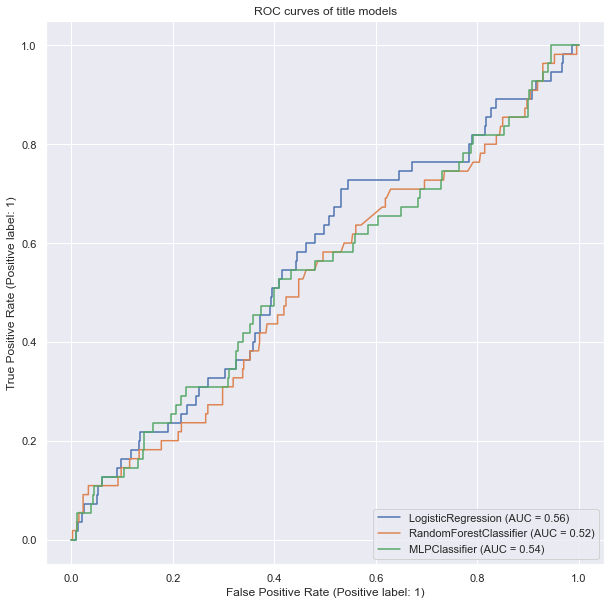

In [17]:
#Let's compare the three title models with an roc curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(log_title_final, X_title_test, y_title_test)
plot_roc_curve(tree_title_final,  X_title_test, y_title_test, ax=disp.ax_)
plot_roc_curve(title_mlp_final,  X_title_test, y_title_test, ax=disp.ax_)
plt.title('ROC curves of title models')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
 

Text(0.5, 1.0, 'ROC curves of text models')

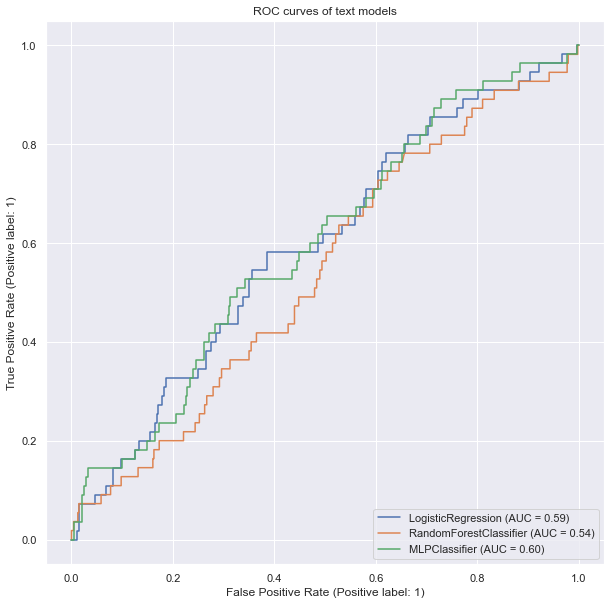

In [22]:
#Do the same but for the text models now
disp = plot_roc_curve(log_text_final, X_text_test, y_text_test)
plot_roc_curve(tree_text_final,  X_text_test, y_text_test, ax=disp.ax_)
plot_roc_curve(text_mlp_final,  X_text_test, y_text_test, ax=disp.ax_)
plt.title('ROC curves of text models')

In [14]:
#Let's try a deep learning model now
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Conv2D
from keras.models import Sequential#Try pytorch
#Intialize a model
title_deep_model = Sequential()#Try CNN, try sklearn NN mlpclassifier
#Add layers
title_deep_model.add(Conv2D(50, kernel_size=3, activation='relu', 
                            input_shape=(3029, 889, 1), 
                            kernel_regularizer=keras.regularizers.l1_l2(l1=0.0001, l2=0.0001)))
title_deep_model.add(Dropout(0.3))
title_deep_model.add(Dense(25, activation='relu', 
                    kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
title_deep_model.add(Dropout(0.4))
title_deep_model.add(Dense(5, activation='relu'))
title_deep_model.add(Dropout(0.5))
title_deep_model.add(Dense(1, activation='sigmoid'))
#Compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
title_deep_model.compile(optimizer=opt, loss='binary_crossentropy', 
                         metrics=['accuracy', 'AUC'])
#Fit model
title_deep_model.fit([X_title_train], y_title_train, epochs=20, verbose=2, batch_size=32, 
                     validation_data=(X_title_test, y_title_test))

Epoch 1/20


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 3029, 889, 1), found shape=(None, 889)


In [97]:
#Now let's try with the text data
#Intialize a model
text_deep_model = Sequential()
#Add layers
text_deep_model.add(Dense(75, activation='relu', input_shape=(X_text_train.shape[1],)))
text_deep_model.add(Dropout(0.3))
text_deep_model.add(Dense(30, activation='relu'))#Add dropout layer
text_deep_model.add(Dropout(0.3))
text_deep_model.add(Dense(5, activation='relu'))
text_deep_model.add(Dropout(0.3))
text_deep_model.add(Dense(1, activation='sigmoid'))
#Compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
text_deep_model.compile(optimizer=opt, loss='binary_crossentropy', 
                         metrics=['accuracy', 'AUC'])
#Fit model
text_deep_model.fit(X_text_train, y_text_train, epochs=3, verbose=2, 
                     validation_data=(X_text_test, y_text_test))

Epoch 1/3
95/95 - 1s - loss: 0.4532 - accuracy: 0.8696 - auc: 0.5506 - val_loss: 0.3384 - val_accuracy: 0.8972 - val_auc: 0.6027 - 1s/epoch - 15ms/step
Epoch 2/3
95/95 - 1s - loss: 0.3351 - accuracy: 0.8818 - auc: 0.7270 - val_loss: 0.3410 - val_accuracy: 0.8972 - val_auc: 0.5996 - 547ms/epoch - 6ms/step
Epoch 3/3
95/95 - 1s - loss: 0.2113 - accuracy: 0.9241 - auc: 0.9190 - val_loss: 0.5109 - val_accuracy: 0.8935 - val_auc: 0.5914 - 523ms/epoch - 6ms/step


These models don't seem to be improving on much. This may be because there isn't enough data, the data doesn't generalize well or some other reason. The BERT training model is a huge model that has already been trained on millions of data examples. Let's see if we can tweak this model and use it ourselves.

In [32]:
#For this bert model we need to pass the actual text columns
#First let's get title text and labels
X_title_bert = comment_puller.post_df['title'].apply(comment_puller._clean_string)
y_title_bert = comment_puller.title_df['label_id']
#We then split these
X_title_train_bert, X_title_test_bert, y_title_train_bert, y_title_test_bert = train_test_split(
X_title_bert, y_title_bert, test_size=0.15, random_state=10)
#We now do the same for the text body of posts
X_text_bert = comment_puller.post_df['post_text'].apply(comment_puller._clean_string)
y_text_bert = comment_puller.text_df['label_id']
#Split them here
X_text_train_bert, X_text_test_bert, y_text_train_bert, y_text_test_bert = train_test_split(
X_text_bert, y_text_bert, test_size=0.15, random_state=10)

In [100]:
X_text_bert.apply(lambda x: x.split()) #Throw into BertTokenClassifier

0       [brother, inlaw, sammy, lost, home, shortly, d...
1       [ill, try, keep, short, impala, doorhttpsiimgu...
2       [high, schooler, weekend, job, coffee, shop, c...
3       [week, ago, f, family, ordered, chinese, food,...
4       [dad, old, fart, love, daughter, piece, ’, str...
                              ...                        
3559    [screwed, shot, mouth, facebook, said, somethi...
3560    [genderfluid, moved, away, transferred, univer...
3561    [bf, work, shipping, facility, us, car, get, w...
3562    [asshole, wanting, go, funeral, birth, father,...
3563    [self, explanatory, started, anti, depressant,...
Name: post_text, Length: 3564, dtype: object

In [33]:
#Import sklearn-like wrapper for BERT model
from bert_sklearn import BertClassifier 
#Intialize model
bert_title_model = BertClassifier()
#Adjust batch size so it doesn't eat all GPU memory
bert_title_model.train_batch_size=16
#Tune model
bert_title_model.fit(X_title_train_bert, y_title_train_bert)
#Score data
bert_title_model.score(X_title_test_bert, y_title_test_bert)

Building sklearn text classifier...
Loading bert-base-uncased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint
train data size: 2727, validation data size: 302


Validating: 100%|██████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  3.86it/s]

Epoch 1, Train loss: 0.3729, Val loss: 0.4434, Val accy: 84.77%



Validating: 100%|██████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  3.84it/s]

Epoch 2, Train loss: 0.3591, Val loss: 0.4295, Val accy: 84.77%



Validating: 100%|██████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  3.84it/s]

Epoch 3, Train loss: 0.3360, Val loss: 0.4360, Val accy: 84.77%



Testing: 100%|█████████████████████████████████████████████████████████████████████████| 67/67 [00:10<00:00,  6.13it/s]


Loss: 0.3323, Accuracy: 89.72%


89.7196261682243

In [37]:
from sklearn.metrics import roc_auc_score
title_preds = bert_title_model.predict(X_title_test)
roc_auc_score(y_title_test_bert, title_preds)

Predicting: 100%|██████████████████████████████████████████████████████████████████████| 67/67 [00:11<00:00,  6.06it/s]


0.5

In [38]:
#Intialize model
bert_text_model = BertClassifier()
#Try throwing in just after cleaning
#Then try only from df vocab
#Adjust batch size so it doesn't eat all GPU memory
bert_text_model.train_batch_size=16
#Tune model
bert_text_model.fit(X_text_train_bert, y_text_train_bert)
#Score data
bert_text_model.score(X_text_test_bert, y_text_test_bert)

Building sklearn text classifier...
Loading bert-base-uncased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint
train data size: 2727, validation data size: 302


Validating: 100%|██████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  3.81it/s]

Epoch 1, Train loss: 0.3721, Val loss: 0.4449, Val accy: 84.77%



Validating: 100%|██████████████████████████████████████████████████████████████████████| 38/38 [00:09<00:00,  3.81it/s]

Epoch 2, Train loss: 0.3603, Val loss: 0.4318, Val accy: 84.77%



Validating: 100%|██████████████████████████████████████████████████████████████████████| 38/38 [00:10<00:00,  3.80it/s]

Epoch 3, Train loss: 0.3595, Val loss: 0.4319, Val accy: 84.77%



Testing: 100%|█████████████████████████████████████████████████████████████████████████| 67/67 [00:10<00:00,  6.10it/s]


Loss: 0.3318, Accuracy: 89.72%


89.7196261682243

In [103]:
text_preds = bert_text_model.predict_proba(X_text_test_bert)#Try another transfer learning

Predicting: 100%|██████████████████████████████████████████████████████████████████████| 67/67 [00:12<00:00,  5.57it/s]


In [104]:
roc_auc_score(y_text_test_bert, text_preds[:, 1])

0.5156439393939394

In [13]:
BertClassifier().epochs

Building sklearn text classifier...


3

In [94]:
#Open text file to write to 
f = open('training.txt', 'w', encoding='utf-8')

In [95]:
#For our chat bot, we need to create a text file of post titles, text bodies and comments.
#Create an empty string to write to
text = ""
#Make copies of df's to make code easier to read
post_df = comment_puller.post_df.copy()
comment_df = comment_puller.comment_df.copy()
#Get post for specific post_id
for post_id in post_df['post_id']:
    #Retrieve the post and write the title text and body text
    post = post_df[post_df['post_id']==post_id]
    text += post['title'].values[0] + '\n'
    text += post['post_text'].values[0] + '\n'
    #Get the top ten comments of post saved in comment_df
    comments = comment_df[comment_df['post_id'].isin([post_id])]
    #Write them to the text string
    for comment in comments['comment']:
        text += comment + '/n'
    #Write the titles, text bodies and comments to our file
    f.write(text)
    #Reset text
    text = ""

In [96]:
f.close()